# Data understanding

I just put in this notebook the plots before doing any kind of preprocessing, as it is required for the first assignment. As the first point requires to do data understanding without modifying the dataset, please let's put the unmodified things in here

## Cyclists plots

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
cyclist_df = pd.read_csv("./dataset/cyclists.csv")

Text(0.5, 1.0, 'Distribution of Birth Years')

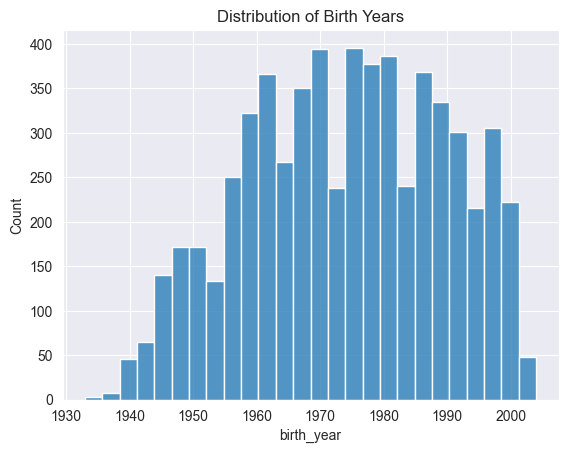

In [3]:
# plot the distribution of birth years
sns.histplot(cyclist_df.birth_year)
plt.title("Distribution of Birth Years")

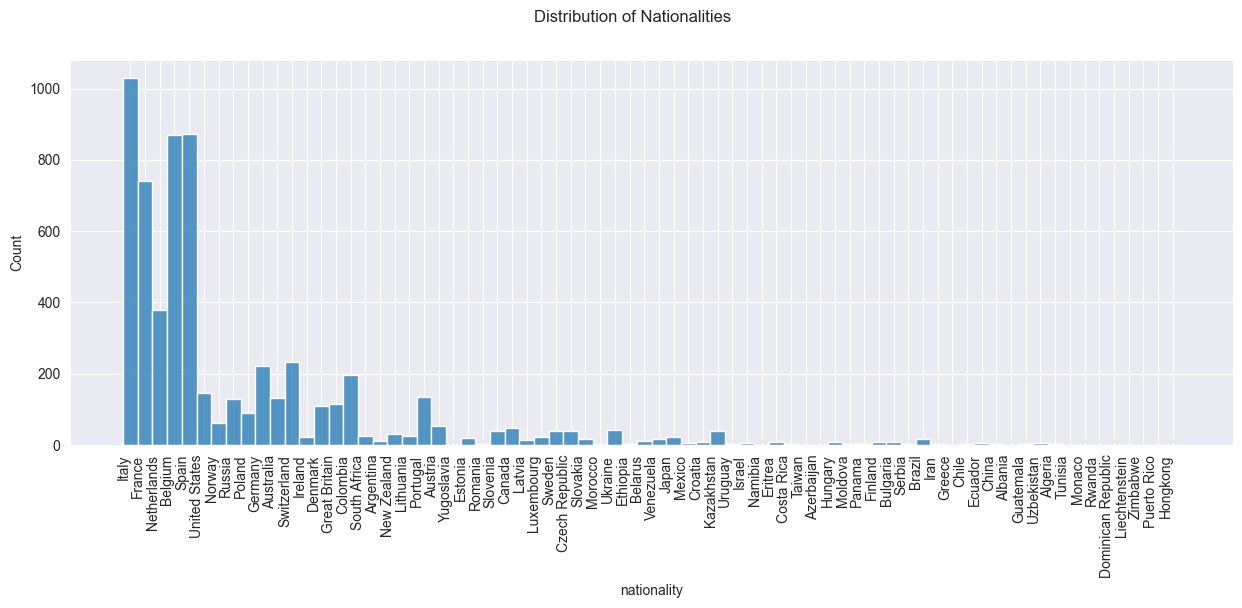

In [4]:
# plot distribution of nationalities
plt.figure(figsize=(15, 5))
sns.histplot(cyclist_df.nationality)
plt.xticks(rotation=90, ha="right")
plt.suptitle("Distribution of Nationalities")
plt.show()

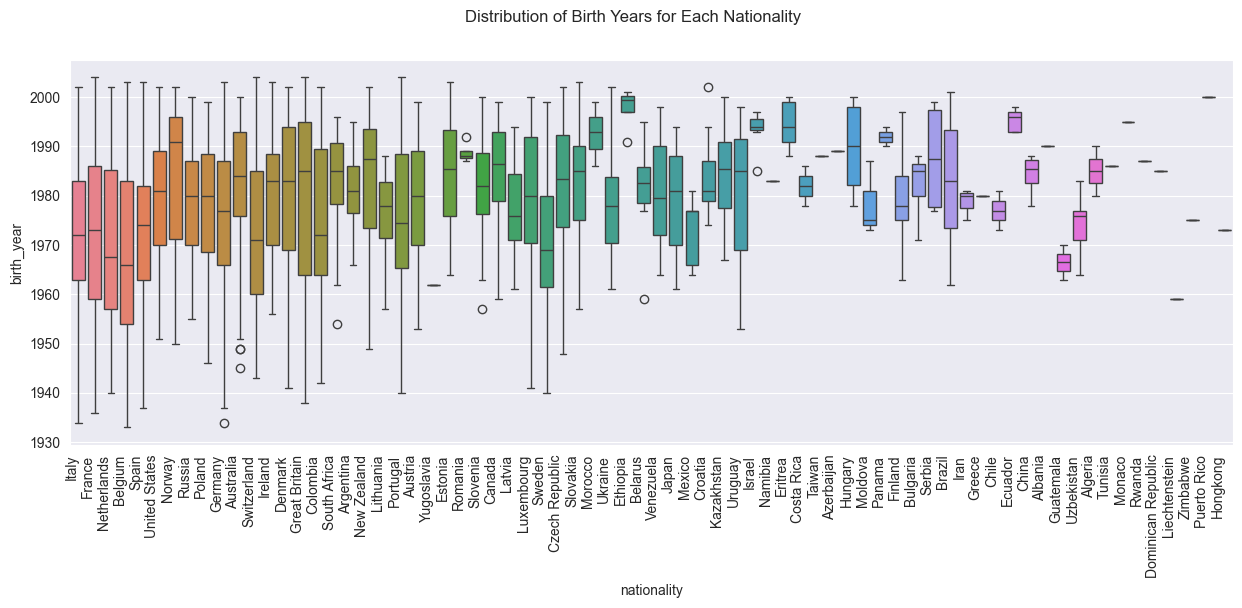

In [5]:
# plot distribution of birth year for each nationality
plt.figure(figsize=(15, 5))
sns.boxplot(x="nationality", y="birth_year", data=cyclist_df, hue="nationality")
plt.xticks(rotation=90, ha="right")
plt.suptitle("Distribution of Birth Years for Each Nationality")
plt.legend([], [], frameon=False)
plt.show()

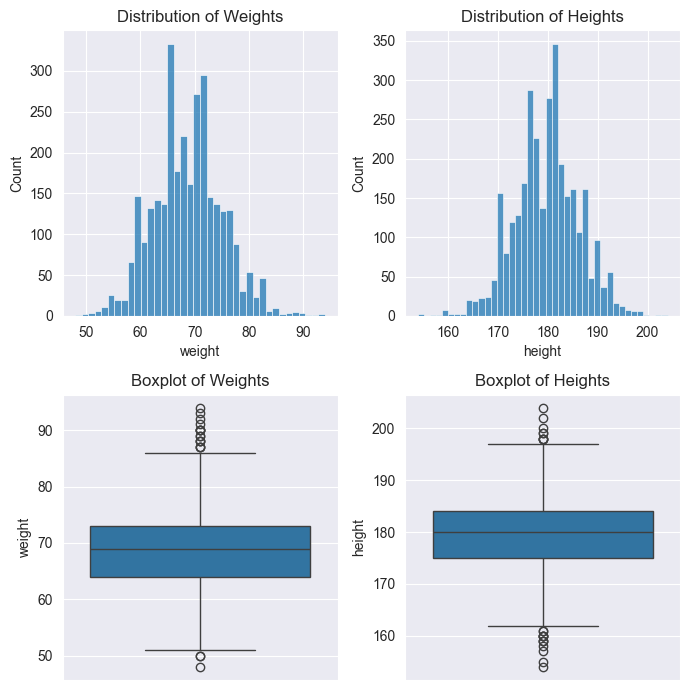

In [6]:
# plot of weith and height distribution
plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
sns.histplot(cyclist_df.weight)
plt.title("Distribution of Weights")
plt.subplot(2, 2, 2)
sns.histplot(cyclist_df.height)
plt.title("Distribution of Heights")
plt.subplot(2, 2, 3)
sns.boxplot(y="weight", data=cyclist_df)
plt.title("Boxplot of Weights")
plt.subplot(2, 2, 4)
sns.boxplot(y="height", data=cyclist_df)
plt.title("Boxplot of Heights")
plt.tight_layout()
plt.show()

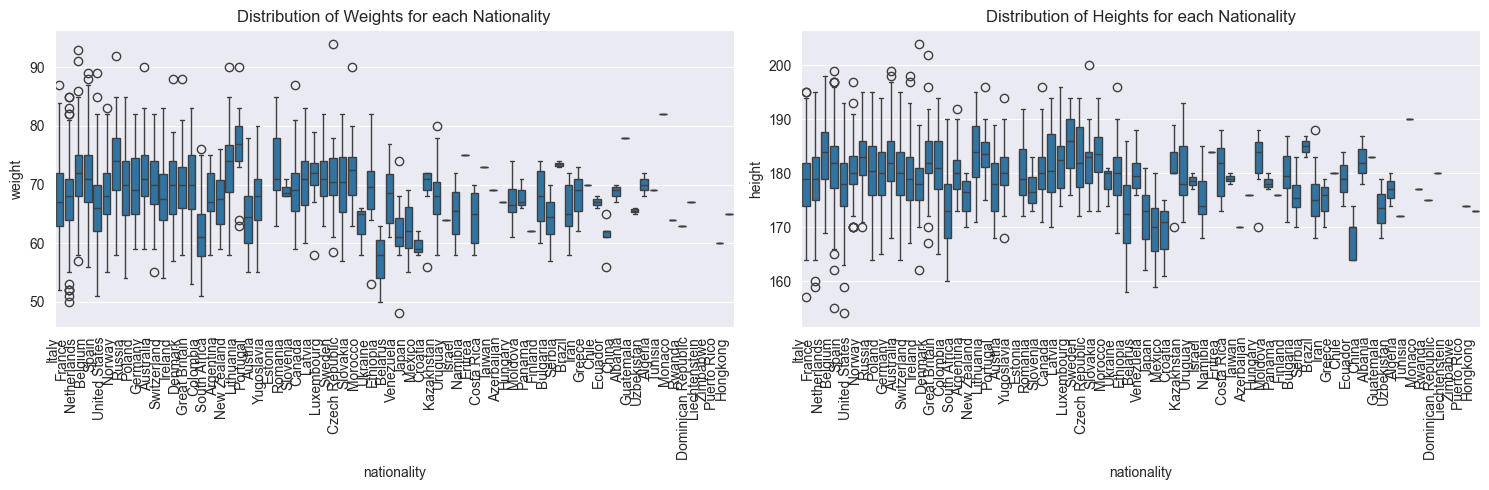

In [7]:
# distribution of weights and heights for each nationality
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x="nationality", y="weight", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.title("Distribution of Weights for each Nationality")
plt.subplot(1, 2, 2)
sns.boxplot(x="nationality", y="height", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.title("Distribution of Heights for each Nationality")
plt.tight_layout()
plt.show()

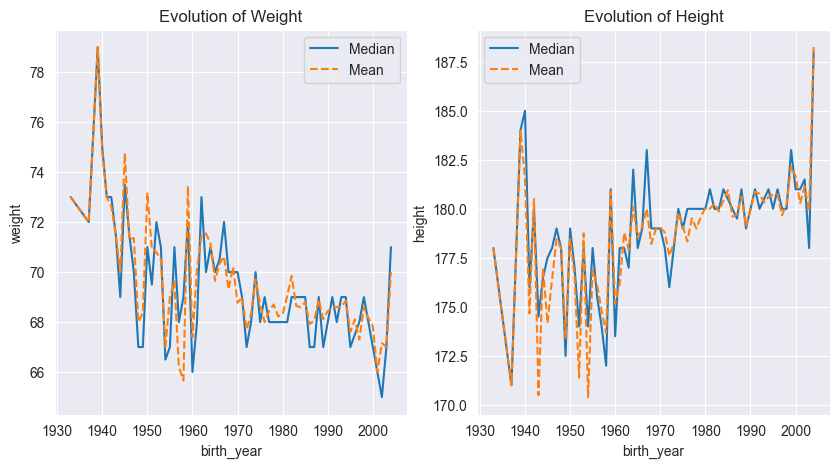

In [8]:
# trend of weight and height over the years
medians = cyclist_df.groupby("birth_year")[["height", "weight"]].median().reset_index()
means = cyclist_df.groupby("birth_year")[["height", "weight"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x="birth_year", y="weight", data=medians, label="Median", linestyle="-")
sns.lineplot(x="birth_year", y="weight", data=means, label="Mean", linestyle="--")
plt.title("Evolution of Weight")
plt.legend()
plt.subplot(1, 2, 2)
sns.lineplot(x="birth_year", y="height", data=medians, label="Median", linestyle="-")
sns.lineplot(x="birth_year", y="height", data=means, label="Mean", linestyle="--")
plt.title("Evolution of Height")
plt.legend()
plt.show()

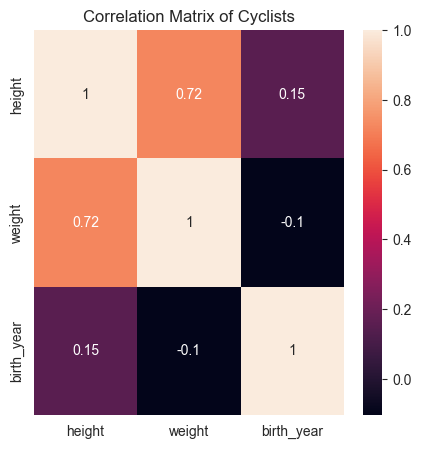

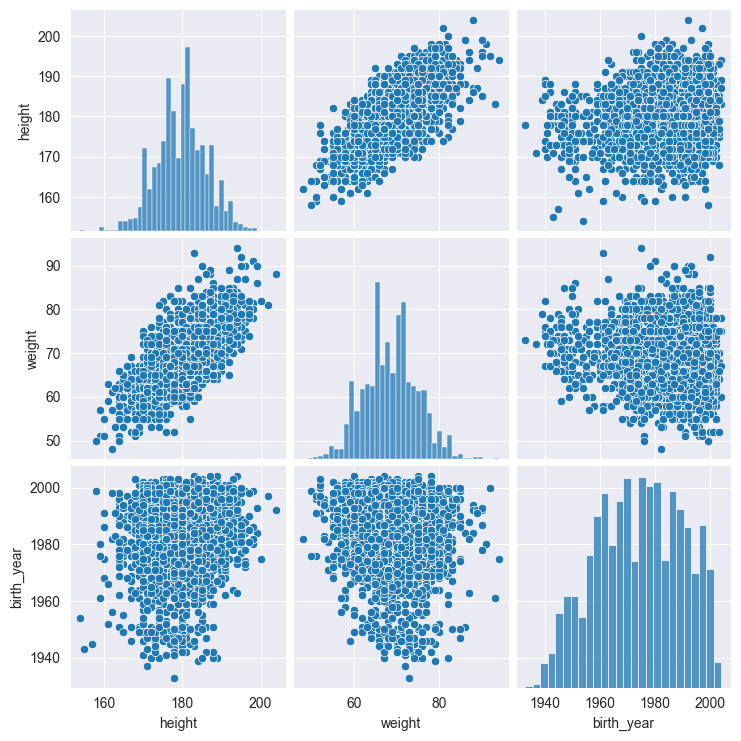

In [9]:
# stamdardize the data
scaler = StandardScaler()
scaled_cyclist_data = scaler.fit_transform(
    cyclist_df[["height", "weight", "birth_year"]]
)

scaled_cyclist_df = pd.DataFrame(
    scaled_cyclist_data, columns=["height", "weight", "birth_year"]
)

# correlation matrix of cyclists
corr = scaled_cyclist_df[["height", "weight", "birth_year"]].corr(method="pearson")
plt.figure(figsize=(5, 5))
plt.title("Correlation Matrix of Cyclists")
sns.heatmap(corr, annot=True)
sns.pairplot(cyclist_df[["height", "weight", "birth_year"]])

## Races

In [10]:
races_df = pd.read_csv("./dataset/races.csv", parse_dates=["date"])
races_df["stage"] = races_df._url.str.split("/").str[-1]
races_df["race"] = races_df["name"]
races_df.drop(columns=["name"], inplace=True)
races_df["year"] = races_df["date"].dt.year
stages_df = races_df.groupby("_url")[
    [
        "_url",
        "stage",
        "race",
        "date",
        "points",
        "uci_points",
        "length",
        "climb_total",
        "profile",
        "startlist_quality",
        "is_tarmac",
        "year",
    ]
].first()

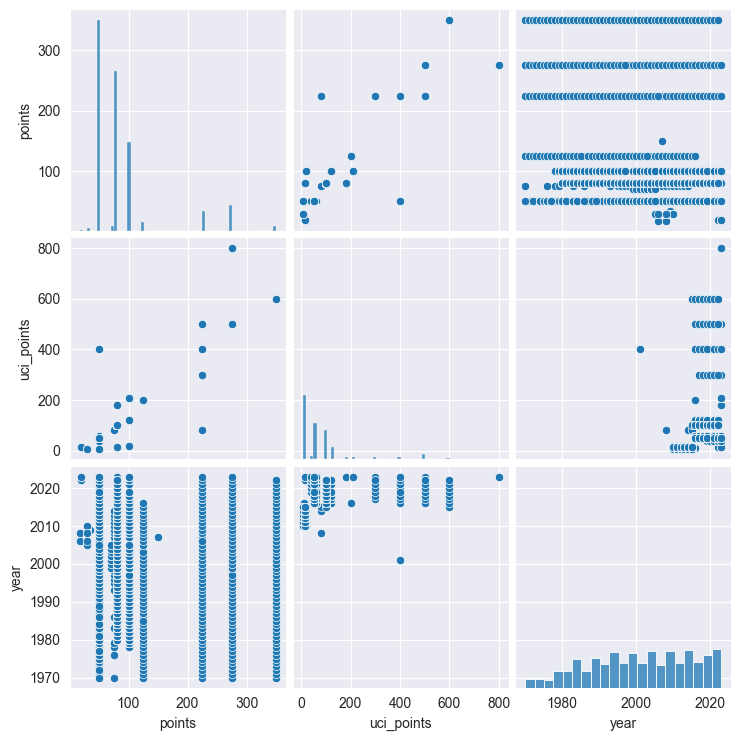

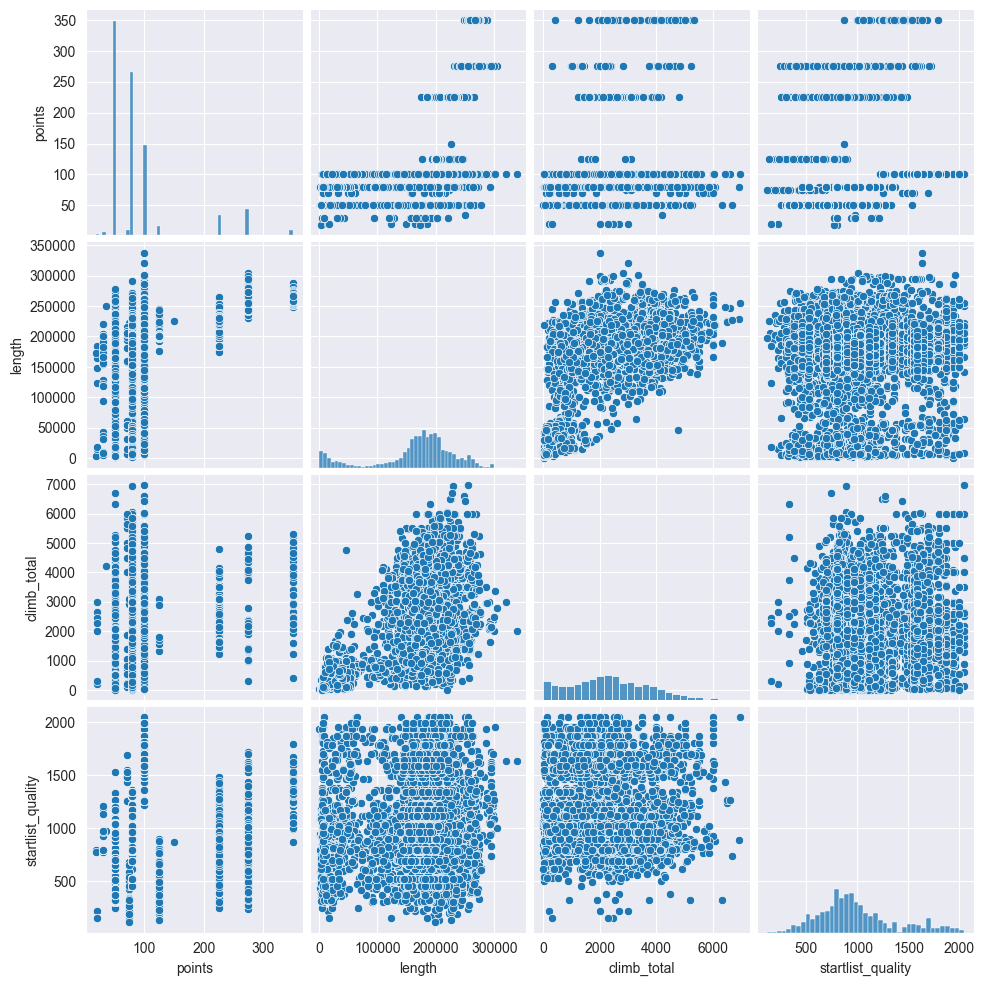

In [11]:
# show points and uci_points distribution
sns.pairplot(stages_df[["points", "uci_points", "year"]])
sns.pairplot(stages_df[["points", "length", "climb_total", "startlist_quality"]])

In [12]:
stages_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5281 entries, amstel-gold-race/1970/result to world-championship/2022/result
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               5281 non-null   object        
 1   stage              5281 non-null   object        
 2   race               5281 non-null   object        
 3   date               5281 non-null   datetime64[ns]
 4   points             5277 non-null   float64       
 5   uci_points         1599 non-null   float64       
 6   length             5281 non-null   float64       
 7   climb_total        3067 non-null   float64       
 8   profile            2873 non-null   float64       
 9   startlist_quality  5281 non-null   int64         
 10  is_tarmac          5281 non-null   bool          
 11  year               5281 non-null   int32         
dtypes: bool(1), datetime64[ns](1), float64(5), int32(1), int64(1), object(

<Axes: >

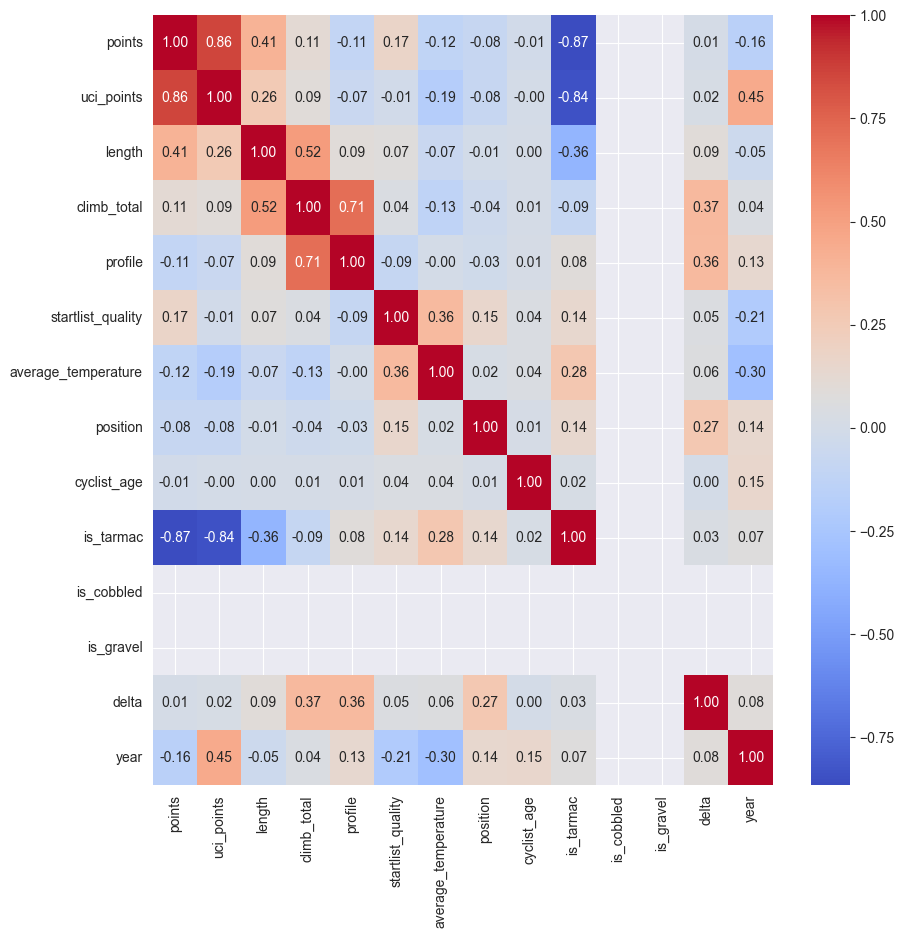

In [13]:
scaler = StandardScaler()

columns_to_scale = [
    "points",
    "uci_points",
    "length",
    "climb_total",
    "startlist_quality",
    "average_temperature",
    "cyclist_age",
    "delta",
    "year",
]

scaled_data = scaler.fit_transform(races_df[columns_to_scale])

scaled_races_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_races_df["is_tarmac"] = races_df["is_tarmac"]
scaled_races_df["profile"] = races_df["profile"]
scaled_races_df["is_cobbled"] = races_df["is_cobbled"]
scaled_races_df["is_gravel"] = races_df["is_gravel"]
scaled_races_df["position"] = races_df["position"]

assert len(scaled_races_df.columns) == 14

correlations = races_df.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")

## Stages

### PCA for data understanding

In [14]:
from sklearn.decomposition import PCA
import numpy as np

In [15]:
stages_df = stages_df.convert_dtypes()
# stages_df["profile"] = stages_df["profile"].astype("category")
stages_df.info()
numeric_dataset = stages_df.select_dtypes(include="number")

<class 'pandas.core.frame.DataFrame'>
Index: 5281 entries, amstel-gold-race/1970/result to world-championship/2022/result
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               5281 non-null   string        
 1   stage              5281 non-null   string        
 2   race               5281 non-null   string        
 3   date               5281 non-null   datetime64[ns]
 4   points             5277 non-null   Int64         
 5   uci_points         1599 non-null   Int64         
 6   length             5281 non-null   Float64       
 7   climb_total        3067 non-null   Int64         
 8   profile            2873 non-null   Int64         
 9   startlist_quality  5281 non-null   Int64         
 10  is_tarmac          5281 non-null   boolean       
 11  year               5281 non-null   Int32         
dtypes: Float64(1), Int32(1), Int64(5), boolean(1), datetime64[ns](1), stri

In [16]:
pca_instance = PCA()
numeric_dataset.dropna(inplace=True)
numeric_dataset.info()
pca_transformation = pca_instance.fit_transform(
    numeric_dataset.drop(columns=["profile"]).values
)

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, amstel-gold-race/2016/result to world-championship/2022/result
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   points             1497 non-null   Int64  
 1   uci_points         1497 non-null   Int64  
 2   length             1497 non-null   Float64
 3   climb_total        1497 non-null   Int64  
 4   profile            1497 non-null   Int64  
 5   startlist_quality  1497 non-null   Int64  
 6   year               1497 non-null   Int32  
dtypes: Float64(1), Int32(1), Int64(5)
memory usage: 97.9+ KB


In [17]:
# variance per component
eigenvalues = pca_instance.explained_variance_
# variance per component, scaled to sum to 1
scaled_eigenvalues = pca_instance.explained_variance_ratio_
# eigenvectors, i.e., axes of reference
eigenvectors = pca_instance.components_


# norm of the whole transformation
transformation_norm_per_column = (pca_transformation**2).sum(axis=0)
cumulative_norm_per_reduction = np.cumsum(transformation_norm_per_column)

pca_dataframe = pd.DataFrame.from_records(
    zip(eigenvalues, scaled_eigenvalues, cumulative_norm_per_reduction),
    columns=["eigenvalues", "scaled_eigenvalues", "transformation_norm"],
)
pca_dataframe

,eigenvalues,scaled_eigenvalues,transformation_norm
0,3.424949e+09,9.995915e-01,5.123723e+12
1,1.273504e+06,3.716796e-04,5.125628e+12
2,1.121790e+05,3.274011e-05,5.125796e+12
3,1.365883e+04,3.986410e-06,5.125817e+12
4,3.696159e+02,1.078746e-07,5.125817e+12
5,6.836997e+00,1.995418e-09,5.125817e+12


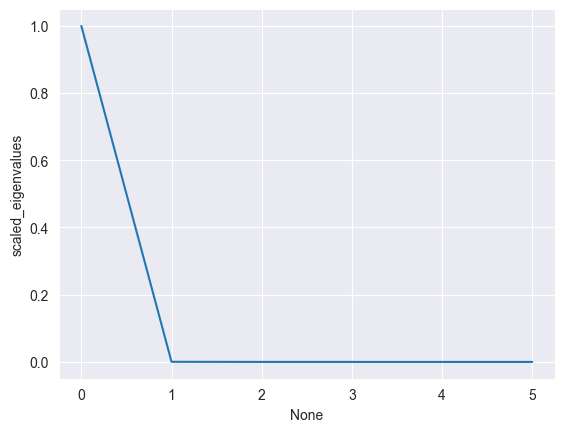

In [18]:
g = sns.lineplot(pca_dataframe, y="scaled_eigenvalues", x=pca_dataframe.index)

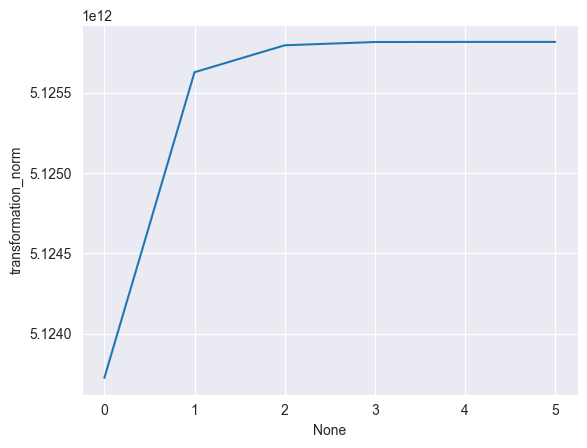

In [19]:
g = sns.lineplot(pca_dataframe, y="transformation_norm", x=pca_dataframe.index)

In [20]:
pca_df = pd.DataFrame(
    {
        "PC1": pca_transformation[:, 0],
        "PC2": pca_transformation[:, 1],
        "profile": numeric_dataset["profile"].values,
    }
)
pca_df.head()

,PC1,PC2,profile
0,84187.377734,-95.637625,2
1,96486.538420,-233.632510,2
2,98488.462236,-89.241416,2
3,101188.700953,-81.347498,2
4,54084.427528,-165.627514,2


<Axes: xlabel='PC1', ylabel='PC2'>

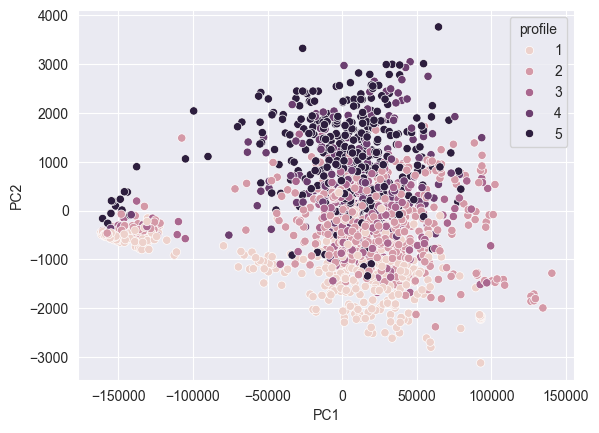

In [21]:
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="profile")

<Axes: xlabel='PC1'>

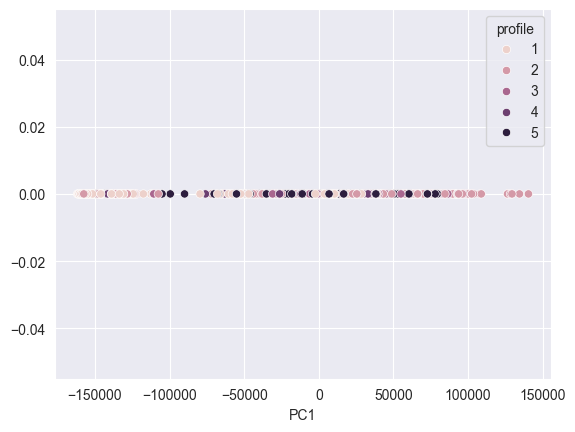

In [22]:
sns.scatterplot(data=pca_df, x="PC1", y=0, hue="profile")

### t-sne

In [23]:
from sklearn.manifold import TSNE

In [24]:
tsne_instance = TSNE(
    n_components=2,
    init="random",
    perplexity=30,
    max_iter=250,
    random_state=42,
)

tsne_representation = tsne_instance.fit_transform(
    numeric_dataset.drop(columns=["profile"]).values
)
divergence = tsne_instance.kl_divergence_
divergence

np.float64(1.7976931348623157e+308)

In [25]:
tsne_df = pd.DataFrame(
    {
        "TSNE1": tsne_representation[:, 0],
        "TSNE2": tsne_representation[:, 1],
        "profile": numeric_dataset["profile"].values,
    }
)

Text(0.5, 1.0, 'TSNE Representation of the Stages Dataset')

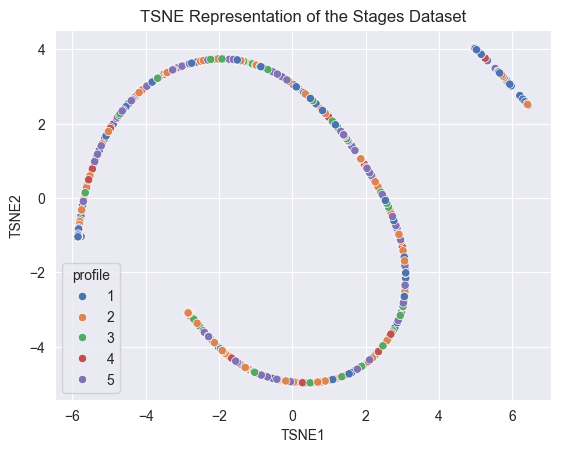

In [26]:
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="profile", palette="deep")
plt.title("TSNE Representation of the Stages Dataset")